# Multi_Class_Classification

### IMPORT NECESSARY PACKAGES

In [1]:
%matplotlib inline
from datetime import date
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import pathlib
import seaborn as sns

/home/jehoram/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### LOAD THE CSV FILE INTO A DATAFRAME

In [2]:
FILE_PATH = pathlib.Path.cwd().joinpath('ObesityDataSet_raw_and_data_sinthetic.csv')
df = pd.read_csv(FILE_PATH)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [3]:
df.shape

(2111, 17)

### SHOW ALL ROWS

In [4]:
pd.set_option("display.max_rows",None)

In [5]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
5       Male  29.000000  1.620000   53.000000                             no   
6     Female  23.000000  1.500000   55.000000                            yes   
7       Male  22.000000  1.640000   53.000000                             no   
8       Male  24.000000  1.780000   64.000000                            yes   
9       Male  22.000000  1.720000   68.000000                            yes   
10      Male  26.000000  1.850000  105.000000                            yes   
11    Female  21.000000  1.720000   80.000000                            yes   
12      Male  22.000000  1.650000   56.000000                             no   
13      Male  41.000000  1.800000   99.000000                             no   
14      Male  23.000000  1.770000   60.000000                            yes   
15    Female  22.000000  1.700000   66.000000                            yes   
16      Male  27.000000  1.930000  102.000000                            yes   
17    Female  29.000000  1.530000   78.000000                             no   
18    Female  30.000000  1.710000   82.000000                            yes   
19    Female  23.000000  1.650000   70.000000                            yes   
20      Male  22.000000  1.650000   80.000000                            yes   
21    Female  52.000000  1.690000   87.000000                            yes   
22    Female  22.000000  1.650000   60.000000                            yes   
23    Female  22.000000  1.600000   82.000000                            yes   
24      Male  21.000000  1.850000   68.000000                            yes   
25      Male  20.000000  1.600000   50.000000                            yes   
26      Male  21.000000  1.700000   65.000000                            yes   
27    Female  23.000000  1.600000   52.000000                             no   
28      Male  19.000000  1.750000   76.000000                            yes   
29      Male  23.000000  1.680000   70.000000                             no   
30      Male  29.000000  1.770000   83.000000                             no   
31    Female  31.000000  1.580000   68.000000                            yes   
32    Female  24.000000  1.770000   76.000000                             no   
33      Male  39.000000  1.790000   90.000000                             no   
34      Male  22.000000  1.650000   62.000000                             no   
35    Female  21.000000  1.500000   65.000000                            yes   
36    Female  22.000000  1.560000   49.000000                             no   
37    Female  21.000000  1.600000   48.000000                             no   
38      Male  23.000000  1.650000   67.000000                            yes   
39    Female  21.000000  1.750000   88.000000                            yes   
40    Female  21.000000  1.670000   75.000000                            yes   
41      Male  23.000000  1.680000   60.000000                             no   
42    Female  21.000000  1.660000   64.000000                            yes   
43      Male  21.000000  1.660000   62.000000                            yes   
44      Male  21.000000  1.810000   80.000000                             no   
45    Female  21.000000  1.530000   65.000000                            yes   
46      Male  21.000000  1.820000   72.000000                            yes   
47      Male  21.000000  1.750000   72.000000                            yes   
48    Female  20.000000  1.660000   60.000000                            yes   
49    

### CHECK IF ANY COLUMN HAS MISSING DATA

In [6]:
not_null_df = df.isnull()
print(not_null_df)

      Gender    Age  Height  Weight  family_history_with_overweight   FAVC  \
0      False  False   False   False                           False  False   
1      False  False   False   False                           False  False   
2      False  False   False   False                           False  False   
3      False  False   False   False                           False  False   
4      False  False   False   False                           False  False   
5      False  False   False   False                           False  False   
6      False  False   False   False                           False  False   
7      False  False   False   False                           False  False   
8      False  False   False   False                           False  False   
9      False  False   False   False                           False  False   
10     False  False   False   False                           False  False   
11     False  False   False   False                           Fa

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### CHECK AND HANDLE DUPLICATES IF ANY

In [8]:
if_duplicate = df[df.duplicated(keep='last')]
if_duplicate.shape

(24, 17)

### CLASS DISTRIBUTION WITH AND WITHOUT DUPLICATES

In [9]:
print("WITH DUPLICATES : ", df.shape)
df.drop_duplicates(inplace=True)
print("WITHOUT DUPLICATES : ", df.shape)

WITH DUPLICATES :  (2111, 17)
WITHOUT DUPLICATES :  (2087, 17)


### AN IN DEPTH LOOK INTO THE EVERY COLUMN

In [10]:
list(df.columns)

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [11]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       2.000000     1.000000     0.630866  
75%       2.466193     1.678102     1.000000  
max       3.000000     3.000000     2.000000

### CHECK THE DISTRIBUTION FOR Age COLUMN - Because of High standard Deviation (std) and High mean

<AxesSubplot:>

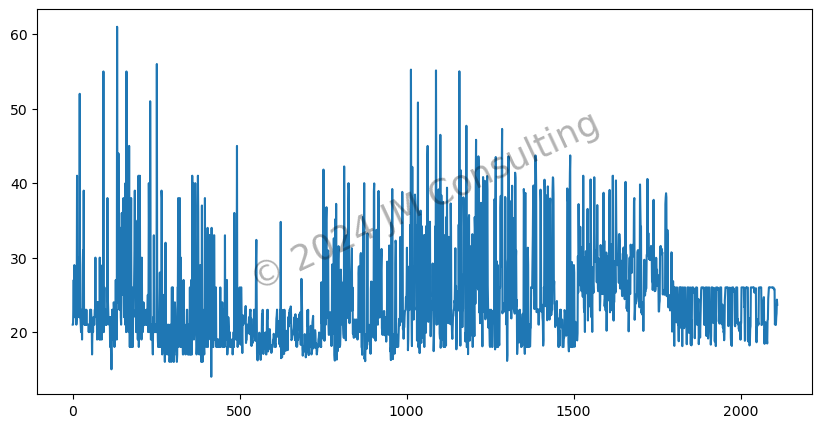

In [12]:
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)

df.Age.plot(figsize=(10,5))

### CHECK THE DISTRIBUTION Weight COLUMN - Because of Very High standard Deviation (std) and Very High mean

<AxesSubplot:>

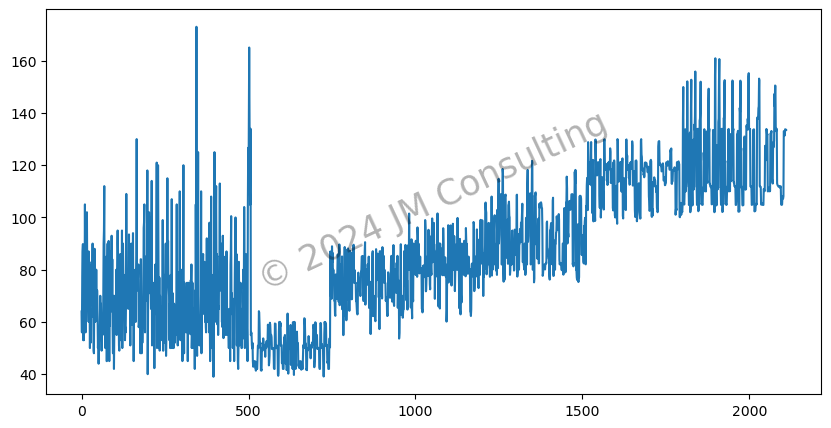

In [13]:
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)


df.Weight.plot(figsize=(10,5))

In [14]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())

Gender
Male      1052
Female    1035
Name: Gender, dtype: int64
Age
18.000000    126
26.000000    101
23.000000     89
21.000000     78
19.000000     59
20.000000     48
22.000000     37
17.000000     30
24.000000     18
25.000000     15
27.000000     14
33.000000     13
29.000000     11
16.000000      8
30.000000      8
41.000000      7
38.000000      7
40.000000      6
34.000000      5
31.000000      4
39.000000      3
32.000000      3
45.000000      3
35.000000      3
36.000000      3
37.000000      3
21.962426      2
21.811190      2
16.306870      2
25.540865      2
25.930376      2
25.783865      2
25.902283      2
25.653233      2
55.000000      2
30.242597      1
25.539411      1
30.958051      1
30.304203      1
33.553360      1
40.794057      1
31.194458      1
25.300208      1
25.478662      1
26.774115      1
30.520854      1
28.704462      1
20.027764      1
24.001685      1
25.100513      1
21.963787      1
38.523646      1
29.429687      1
30.610436      1
31.346845     

### RESET TO SHOW DEFAULT NUMBER OF ROWS

In [15]:
pd.reset_option("display.max_rows")

In [16]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2087 rows x 17 columns]

### CREATING THE TARGET & EXPLANATORY VARIABLE

In [17]:
X = df.drop('NObeyesdad', axis = 'columns')
y = df['NObeyesdad']

### PREPROCESS THE DATA

In [18]:
def obesity_level_preprocess(X):
    # columns to drop
    to_drop = ['SCC', 'TUE']
    
    X_trans = X.drop(to_drop, axis='columns')
    
    #convert to bool
    to_bool = ['family_history_with_overweight', 'FAVC','SMOKE']
    # function to convert to bool
    def convert_fill_bool(val):
        if val == 'yes': return 1
        elif val == 'Yes': return 1
        else: return 0
        
    for col in to_bool:
        X_trans[col] = X_trans[col].apply(convert_fill_bool)
    return X_trans

In [19]:
X = obesity_level_preprocess(X)
df = pd.concat([y,X], axis = 'columns')
# .dropna()
df.head()

NObeyesdad  Gender   Age  Height  Weight  \
0        Normal_Weight  Female  21.0    1.62    64.0   
1        Normal_Weight  Female  21.0    1.52    56.0   
2        Normal_Weight    Male  23.0    1.80    77.0   
3   Overweight_Level_I    Male  27.0    1.80    87.0   
4  Overweight_Level_II    Male  22.0    1.78    89.8   

   family_history_with_overweight  FAVC  FCVC  NCP       CAEC  SMOKE  CH2O  \
0                               1     0   2.0  3.0  Sometimes      0   2.0   
1                               1     0   3.0  3.0  Sometimes      1   3.0   
2                               1     0   2.0  3.0  Sometimes      0   2.0   
3                               0     0   3.0  3.0  Sometimes      0   2.0   
4                               0     0   2.0  1.0  Sometimes      0   2.0   

   FAF        CALC                 MTRANS  
0  0.0          no  Public_Transportation  
1  3.0   Sometimes  Public_Transportation  
2  2.0  Frequently  Public_Transportation  
3  2.0  Frequently                Walking  
4  0.0   Sometimes  Public_Transportation

### CREATE A FUNCTION FOR ONE HOT ENCONDING THE Gender

In [20]:
# function for Gender one hot enconding
def gender_one_hot(data):
    if data == 'Female' or data == 'female':
        data = 0
    elif data == 'Male' or data == 'male':
        data = 0
    return data

In [21]:
df['Gender'] = df['Gender'].apply(gender_one_hot)

### CREATE A FUNCTION FOR ONE HOT ENCONDING THE MTRANS

In [22]:
def mtrans_one_hot (val):
    if val == 'Automobile' : return 0
    if val == 'Motorbike' : return 0
    if val == 'Public_Transportation' : return 0
    if val == 'Walking' : return 1
    if val == 'Bike' : return 1
    else: return np.nan    

In [23]:
df['MTRANS'] = df['MTRANS'].apply(mtrans_one_hot)    

### CREATE A FUNCTION TO CHANGE THE Age ACCORDING TO RANGE

In [24]:
def convert_age_range (val):
    if (10.0<val<=19.0) : return 1
    if (20.0<val<=29.0) : return 2
    if (30.0<val<=39.0) : return 3
    if (40.0<val<=49.0) : return 4
    if (50.0<val<=59.0) : return 5
    if (60.0<val<=69.0) : return 6
    else: return np.nan    

In [25]:
df['Age'] = df['Age'].apply(convert_age_range)

### CREATE A FUNCTION TO CHANGE THE Weight ACCORDING TO RANGE

In [26]:
def convert_weight_range (val):
    if (39.0<val<=58.0) : return 1
    if (59.0<val<=78.0) : return 2
    if (79.0<val<=98.0) : return 3
    if (99.0<val<=118.0) : return 4
    if (119.0<val<=138.0) : return 5
    if (139.0<val<=158.0) : return 6
    if (159.0<val<=178.0) : return 6
    else: return np.nan    

In [27]:
df['Weight'] = df['Weight'].apply(convert_weight_range)

### CREATE A FUNCTION TO CHANGE THE FAF ACCORDING TO RANGE

In [28]:
def convert_faf_range (val):
    if (0.0<val<=1.0) : return 1
    if (1.0<val<=2.0) : return 2
    if (2.0<val<=4.0) : return 3
    if (4.0<val<=5.0) : return 4
    else: return np.nan    

In [29]:
df['FAF'] = df['FAF'].apply(convert_faf_range)

### CREATE A FUNCTION TO CHANGE THE CAEC ACCORDING TO RANGE

In [30]:
def convert_caec_range (val):
    if val=='no' : return 1
    if val=='Sometime' : return 2
    if val=='Frequently' : return 3
    if val=='Always' : return 4
    else: return np.nan    

In [31]:
df['CAEC'] = df['CAEC'].apply(convert_caec_range)

### CREATE A FUNCTION TO CHANGE THE CALC ACCORDING TO RANGE

In [32]:
def convert_calc_range (val):
    if val=='no' : return 1
    if val=='Sometime' : return 2
    if val=='Frequently' : return 3
    if val=='Always' : return 4
    else: return np.nan

In [33]:
df['CALC'] = df['CALC'].apply(convert_calc_range)

### CREATE A FUNCTION FOR ONE HOT ENCODING NObeyesdad

In [34]:
def NObeyesdad_one_hot (val):
    if val == 'Insufficient_Weight' : return 1
    if val == 'Normal_Weight' : return 2
    if val == 'Overweight_Level_I' : return 3
    if val == 'Overweight_Level_II' : return 4
    if val == 'Obesity_Type_I' : return 5
    if val == 'Obesity_Type_II' : return 6
    if val == 'Obesity_Type_III' : return 7
    else: return np.nan  

In [35]:
df['NObeyesdad'] = df['NObeyesdad'].apply(NObeyesdad_one_hot)

In [36]:
df.head()

NObeyesdad  Gender  Age  Height  Weight  family_history_with_overweight  \
0           2       0  2.0    1.62     2.0                               1   
1           2       0  2.0    1.52     1.0                               1   
2           2       0  2.0    1.80     2.0                               1   
3           3       0  2.0    1.80     3.0                               0   
4           4       0  2.0    1.78     3.0                               0   

   FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  FAF  CALC  MTRANS  
0     0   2.0  3.0   NaN      0   2.0  NaN   1.0       0  
1     0   3.0  3.0   NaN      1   3.0  3.0   NaN       0  
2     0   2.0  3.0   NaN      0   2.0  2.0   3.0       0  
3     0   3.0  3.0   NaN      0   2.0  2.0   3.0       1  
4     0   2.0  1.0   NaN      0   2.0  NaN   NaN       0

In [37]:
print(df.shape)

(2087, 15)


### CHECK IF ANY COLUMN HAS MISSING DATA

In [38]:
is_na_df = df.isna()
print(is_na_df)

      NObeyesdad  Gender    Age  Height  Weight  \
0          False   False  False   False   False   
1          False   False  False   False   False   
2          False   False  False   False   False   
3          False   False  False   False   False   
4          False   False  False   False   False   
...          ...     ...    ...     ...     ...   
2106       False   False  False   False   False   
2107       False   False  False   False   False   
2108       False   False  False   False   False   
2109       False   False  False   False   False   
2110       False   False  False   False   False   

      family_history_with_overweight   FAVC   FCVC    NCP  CAEC  SMOKE   CH2O  \
0                              False  False  False  False  True  False  False   
1                              False  False  False  False  True  False  False   
2                              False  False  False  False  True  False  False   
3                              False  False  False  False  True

In [39]:
df.isna().sum()

NObeyesdad                           0
Gender                               0
Age                                238
Height                               0
Weight                             101
family_history_with_overweight       0
FAVC                                 0
FCVC                                 0
NCP                                  0
CAEC                              1761
SMOKE                                0
CH2O                                 0
FAF                                405
CALC                              1380
MTRANS                               0
dtype: int64

In [40]:
df.head()

NObeyesdad  Gender  Age  Height  Weight  family_history_with_overweight  \
0           2       0  2.0    1.62     2.0                               1   
1           2       0  2.0    1.52     1.0                               1   
2           2       0  2.0    1.80     2.0                               1   
3           3       0  2.0    1.80     3.0                               0   
4           4       0  2.0    1.78     3.0                               0   

   FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  FAF  CALC  MTRANS  
0     0   2.0  3.0   NaN      0   2.0  NaN   1.0       0  
1     0   3.0  3.0   NaN      1   3.0  3.0   NaN       0  
2     0   2.0  3.0   NaN      0   2.0  2.0   3.0       0  
3     0   3.0  3.0   NaN      0   2.0  2.0   3.0       1  
4     0   2.0  1.0   NaN      0   2.0  NaN   NaN       0

In [41]:
print(df.shape)

(2087, 15)


### CREATE A FUNCTION TO REMOVE NaN

In [42]:
def remove_nan(x):
    if x == 'NaN':
        return 0
    else:
        return x

In [43]:
df['Age'] = df['Age'].apply(remove_nan)
df['Weight'] = df['Weight'].apply(remove_nan)
df['CAEC'] = df['CAEC'].apply(remove_nan)
df['FAF'] = df['FAF'].apply(remove_nan)
df['CALC'] = df['CALC'].apply(remove_nan)

In [44]:
df['Age'] = df['Age'].fillna(0)
df['Weight'] = df['Weight'].fillna(0)
df['CAEC'] = df['CAEC'].fillna(0)
df['FAF'] = df['FAF'].fillna(0)
df['CALC'] = df['CALC'].fillna(0)

In [45]:
df.isna().sum()

NObeyesdad                        0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
FAF                               0
CALC                              0
MTRANS                            0
dtype: int64

In [46]:
#df['Gender']= df['Gender'].astype(float) 
df["Gender"] = [float(str(i).replace(",", "")) for i in df["Gender"]]
df['family_history_with_overweight']= df['family_history_with_overweight'].astype(float) 
df['FAVC']= df['FAVC'].astype(float) 
df['CAEC']= df['CAEC'].astype(float) 
df['SMOKE']= df['SMOKE'].astype(float) 
df['MTRANS']= df['MTRANS'].astype(float) 
df['NObeyesdad']= df['NObeyesdad'].astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NObeyesdad                      2087 non-null   float64
 1   Gender                          2087 non-null   float64
 2   Age                             2087 non-null   float64
 3   Height                          2087 non-null   float64
 4   Weight                          2087 non-null   float64
 5   family_history_with_overweight  2087 non-null   float64
 6   FAVC                            2087 non-null   float64
 7   FCVC                            2087 non-null   float64
 8   NCP                             2087 non-null   float64
 9   CAEC                            2087 non-null   float64
 10  SMOKE                           2087 non-null   float64
 11  CH2O                            2087 non-null   float64
 12  FAF                             20

In [48]:
dtypeCount =[df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])]
dtypeCount

[<class 'float'>    2087
 Name: NObeyesdad, dtype: int64,
 <class 'float'>    2087
 Name: Gender, dtype: int64,
 <class 'float'>    2087
 Name: Age, dtype: int64,
 <class 'float'>    2087
 Name: Height, dtype: int64,
 <class 'float'>    2087
 Name: Weight, dtype: int64,
 <class 'float'>    2087
 Name: family_history_with_overweight, dtype: int64,
 <class 'float'>    2087
 Name: FAVC, dtype: int64,
 <class 'float'>    2087
 Name: FCVC, dtype: int64,
 <class 'float'>    2087
 Name: NCP, dtype: int64,
 <class 'float'>    2087
 Name: CAEC, dtype: int64,
 <class 'float'>    2087
 Name: SMOKE, dtype: int64,
 <class 'float'>    2087
 Name: CH2O, dtype: int64,
 <class 'float'>    2087
 Name: FAF, dtype: int64,
 <class 'float'>    2087
 Name: CALC, dtype: int64,
 <class 'float'>    2087
 Name: MTRANS, dtype: int64]

In [49]:
df.dropna()

NObeyesdad  Gender  Age    Height  Weight  \
0            2.0     0.0  2.0  1.620000     2.0   
1            2.0     0.0  2.0  1.520000     1.0   
2            2.0     0.0  2.0  1.800000     2.0   
3            3.0     0.0  2.0  1.800000     3.0   
4            4.0     0.0  2.0  1.780000     3.0   
...          ...     ...  ...       ...     ...   
2106         7.0     0.0  2.0  1.710730     5.0   
2107         7.0     0.0  2.0  1.748584     5.0   
2108         7.0     0.0  2.0  1.752206     5.0   
2109         7.0     0.0  2.0  1.739450     5.0   
2110         7.0     0.0  2.0  1.738836     5.0   

      family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  \
0                                1.0   0.0   2.0  3.0   0.0    0.0  2.000000   
1                                1.0   0.0   3.0  3.0   0.0    1.0  3.000000   
2                                1.0   0.0   2.0  3.0   0.0    0.0  2.000000   
3                                0.0   0.0   3.0  3.0   0.0    0.0  2.000000   
4                                0.0   0.0   2.0  1.0   0.0    0.0  2.000000   
...                              ...   ...   ...  ...   ...    ...       ...   
2106                             1.0   1.0   3.0  3.0   0.0    0.0  1.728139   
2107                             1.0   1.0   3.0  3.0   0.0    0.0  2.005130   
2108                             1.0   1.0   3.0  3.0   0.0    0.0  2.054193   
2109                             1.0   1.0   3.0  3.0   0.0    0.0  2.852339   
2110                             1.0   1.0   3.0  3.0   0.0    0.0  2.863513   

      FAF  CALC  MTRANS  
0     0.0   1.0     0.0  
1     3.0   0.0     0.0  
2     2.0   3.0     0.0  
3     2.0   3.0     1.0  
4     0.0   0.0     0.0  
...   ...   ...     ...  
2106  2.0   0.0     0.0  
2107  2.0   0.0     0.0  
2108  2.0   0.0     0.0  
2109  2.0   0.0     0.0  
2110  2.0   0.0     0.0  

[2087 rows x 15 columns]

### SHOW ALL ROWS

In [50]:
pd.set_option("display.max_rows",None)

In [51]:
df

NObeyesdad  Gender  Age    Height  Weight  \
0            2.0     0.0  2.0  1.620000     2.0   
1            2.0     0.0  2.0  1.520000     1.0   
2            2.0     0.0  2.0  1.800000     2.0   
3            3.0     0.0  2.0  1.800000     3.0   
4            4.0     0.0  2.0  1.780000     3.0   
5            2.0     0.0  2.0  1.620000     1.0   
6            2.0     0.0  2.0  1.500000     1.0   
7            2.0     0.0  2.0  1.640000     1.0   
8            2.0     0.0  2.0  1.780000     2.0   
9            2.0     0.0  2.0  1.720000     2.0   
10           5.0     0.0  2.0  1.850000     4.0   
11           4.0     0.0  2.0  1.720000     3.0   
12           2.0     0.0  2.0  1.650000     1.0   
13           5.0     0.0  4.0  1.800000     0.0   
14           2.0     0.0  2.0  1.770000     2.0   
15           2.0     0.0  2.0  1.700000     2.0   
16           4.0     0.0  2.0  1.930000     4.0   
17           5.0     0.0  2.0  1.530000     2.0   
18           4.0     0.0  0.0  1.710000     3.0   
19           3.0     0.0  2.0  1.650000     2.0   
20           4.0     0.0  2.0  1.650000     3.0   
21           5.0     0.0  5.0  1.690000     3.0   
22           2.0     0.0  2.0  1.650000     2.0   
23           5.0     0.0  2.0  1.600000     3.0   
24           2.0     0.0  2.0  1.850000     2.0   
25           2.0     0.0  0.0  1.600000     1.0   
26           2.0     0.0  2.0  1.700000     2.0   
27           2.0     0.0  2.0  1.600000     1.0   
28           2.0     0.0  1.0  1.750000     2.0   
29           2.0     0.0  2.0  1.680000     2.0   
30           3.0     0.0  2.0  1.770000     3.0   
31           4.0     0.0  3.0  1.580000     2.0   
32           2.0     0.0  2.0  1.770000     2.0   
33           4.0     0.0  3.0  1.790000     3.0   
34           2.0     0.0  2.0  1.650000     2.0   
35           4.0     0.0  2.0  1.500000     2.0   
36           2.0     0.0  2.0  1.560000     1.0   
37           2.0     0.0  2.0  1.600000     1.0   
38           2.0     0.0  2.0  1.650000     2.0   
39           4.0     0.0  2.0  1.750000     3.0   
40           3.0     0.0  2.0  1.670000     2.0   
41           2.0     0.0  2.0  1.680000     2.0   
42           2.0     0.0  2.0  1.660000     2.0   
43           2.0     0.0  2.0  1.660000     2.0   
44           2.0     0.0  2.0  1.810000     3.0   
45           4.0     0.0  2.0  1.530000     2.0   
46           2.0     0.0  2.0  1.820000     2.0   
47           2.0     0.0  2.0  1.750000     2.0   
48           2.0     0.0  0.0  1.660000     2.0   
49           2.0     0.0  2.0  1.550000     1.0   
50           2.0     0.0  2.0  1.610000     1.0   
51           2.0     0.0  0.0  1.500000     1.0   
52           2.0     0.0  2.0  1.640000     1.0   
53           2.0     0.0  2.0  1.630000     1.0   
54           2.0     0.0  2.0  1.600000     1.0   
55           2.0     0.0  2.0  1.680000     2.0   
56           2.0     0.0  2.0  1.700000     2.0   
57           2.0     0.0  2.0  1.640000     2.0   
58           2.0     0.0  1.0  1.650000     2.0   
59           1.0     0.0  0.0  1.760000     1.0   
60           2.0     0.0  2.0  1.550000     1.0   
61           2.0     0.0  0.0  1.650000     1.0   
62           2.0     0.0  2.0  1.670000     2.0   
63           2.0     0.0  2.0  1.680000     1.0   
64           2.0     0.0  2.0  1.660000     1.0   
65           3.0     0.0  2.0  1.620000     2.0   
66           4.0     0.0  2.0  1.800000     3.0   
67           5.0     0.0  2.0  1.650000     3.0   
68           6.0     0.0  0.0  1.760000     4.0   
69           2.0     0.0  2.0  1.800000     2.0   
70           4.0     0.0  2.0  1.650000     3.0   
71           1.0     0.0  2.0  1.670000     1.0   
72           2.0     0.0  2.0  1.650000     2.0   
73           2.0     0.0  1.0  1.850000     2.0   
74           4.0     0.0  2.0  1.700000     3.0   
75           1.0     0.0  2.0  1.630000     1.0   
76           1.0     0.0  2.0  1.600000     1.0   
77           4.0     0.0  2.

### RESET TO SHOW DEFAULT NUMBER OF ROWS

In [52]:
pd.reset_option("display.max_rows")

In [53]:
df

NObeyesdad  Gender  Age    Height  Weight  \
0            2.0     0.0  2.0  1.620000     2.0   
1            2.0     0.0  2.0  1.520000     1.0   
2            2.0     0.0  2.0  1.800000     2.0   
3            3.0     0.0  2.0  1.800000     3.0   
4            4.0     0.0  2.0  1.780000     3.0   
...          ...     ...  ...       ...     ...   
2106         7.0     0.0  2.0  1.710730     5.0   
2107         7.0     0.0  2.0  1.748584     5.0   
2108         7.0     0.0  2.0  1.752206     5.0   
2109         7.0     0.0  2.0  1.739450     5.0   
2110         7.0     0.0  2.0  1.738836     5.0   

      family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  \
0                                1.0   0.0   2.0  3.0   0.0    0.0  2.000000   
1                                1.0   0.0   3.0  3.0   0.0    1.0  3.000000   
2                                1.0   0.0   2.0  3.0   0.0    0.0  2.000000   
3                                0.0   0.0   3.0  3.0   0.0    0.0  2.000000   
4                                0.0   0.0   2.0  1.0   0.0    0.0  2.000000   
...                              ...   ...   ...  ...   ...    ...       ...   
2106                             1.0   1.0   3.0  3.0   0.0    0.0  1.728139   
2107                             1.0   1.0   3.0  3.0   0.0    0.0  2.005130   
2108                             1.0   1.0   3.0  3.0   0.0    0.0  2.054193   
2109                             1.0   1.0   3.0  3.0   0.0    0.0  2.852339   
2110                             1.0   1.0   3.0  3.0   0.0    0.0  2.863513   

      FAF  CALC  MTRANS  
0     0.0   1.0     0.0  
1     3.0   0.0     0.0  
2     2.0   3.0     0.0  
3     2.0   3.0     1.0  
4     0.0   0.0     0.0  
...   ...   ...     ...  
2106  2.0   0.0     0.0  
2107  2.0   0.0     0.0  
2108  2.0   0.0     0.0  
2109  2.0   0.0     0.0  
2110  2.0   0.0     0.0  

[2087 rows x 15 columns]

In [54]:
print(X)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                               1   
1     Female  21.000000  1.520000   56.000000                               1   
2       Male  23.000000  1.800000   77.000000                               1   
3       Male  27.000000  1.800000   87.000000                               0   
4       Male  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106  Female  20.976842  1.710730  131.408528                               1   
2107  Female  21.982942  1.748584  133.742943                               1   
2108  Female  22.524036  1.752206  133.689352                               1   
2109  Female  24.361936  1.739450  133.346641                               1   
2110  Female  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP      

In [55]:
print(y)

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2087, dtype: object


In [56]:
# print(X)
X = df.drop(['NObeyesdad'], axis='columns')
y = df.loc[:, 'NObeyesdad']

In [57]:
print(X)

      Gender  Age    Height  Weight  family_history_with_overweight  FAVC  \
0        0.0  2.0  1.620000     2.0                             1.0   0.0   
1        0.0  2.0  1.520000     1.0                             1.0   0.0   
2        0.0  2.0  1.800000     2.0                             1.0   0.0   
3        0.0  2.0  1.800000     3.0                             0.0   0.0   
4        0.0  2.0  1.780000     3.0                             0.0   0.0   
...      ...  ...       ...     ...                             ...   ...   
2106     0.0  2.0  1.710730     5.0                             1.0   1.0   
2107     0.0  2.0  1.748584     5.0                             1.0   1.0   
2108     0.0  2.0  1.752206     5.0                             1.0   1.0   
2109     0.0  2.0  1.739450     5.0                             1.0   1.0   
2110     0.0  2.0  1.738836     5.0                             1.0   1.0   

      FCVC  NCP  CAEC  SMOKE      CH2O  FAF  CALC  MTRANS  
0      2.0  3.0

In [58]:
print(y)

0       2.0
1       2.0
2       2.0
3       3.0
4       4.0
       ... 
2106    7.0
2107    7.0
2108    7.0
2109    7.0
2110    7.0
Name: NObeyesdad, Length: 2087, dtype: float64


### THE TRAIN TEST SPLIT

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1565 522 1565 522


### IMPORT LIBRARIES FOR MODEL TRAINING

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### DECISION TREE CLASSIFIER

Decision Tree Accuracy Score : 0.764367816091954
Decision Tree Classification Report : 
              precision    recall  f1-score   support

         1.0       0.86      0.91      0.88        67
         2.0       0.69      0.67      0.68        81
         3.0       0.56      0.78      0.65        73
         4.0       0.67      0.58      0.62        69
         5.0       0.83      0.54      0.65        80
         6.0       0.81      0.91      0.86        68
         7.0       1.00      0.98      0.99        84

    accuracy                           0.76       522
   macro avg       0.77      0.77      0.76       522
weighted avg       0.78      0.76      0.76       522



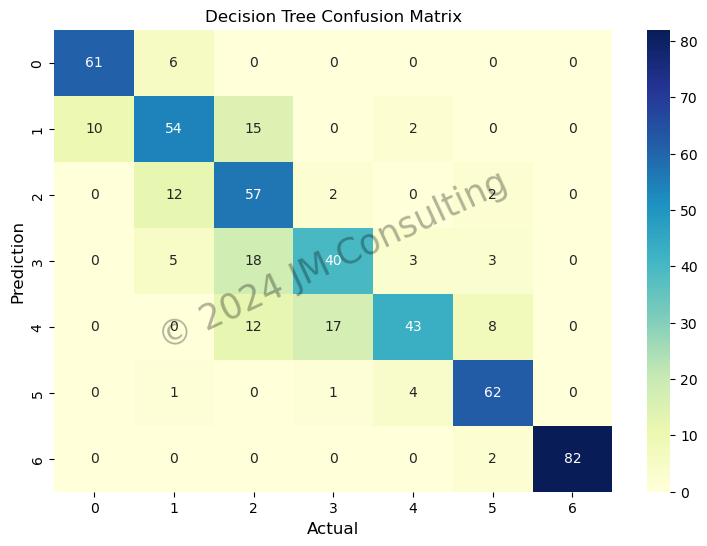

In [61]:
#import necessary libraries
from sklearn.tree import DecisionTreeClassifier

#training a DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(class_weight='balanced', max_depth=7).fit(X_train, y_train)
dtree_predctions = dtree_model.predict(X_test)

#print accuracy
dtree_accuracy = accuracy_score(y_test, dtree_predctions)
print("Decision Tree Accuracy Score : % s"%(dtree_accuracy))

#print classification report
dtree_classfx_report = classification_report(y_test, dtree_predctions)
print("Decision Tree Classification Report : ")
print(dtree_classfx_report)

#create a confusion matrix
dtree_cx_matrix = confusion_matrix(y_test, dtree_predctions)
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(dtree_cx_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
plt.ylabel('Prediction', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('Decision Tree Confusion Matrix', fontsize=12)
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

### VISUALISE THE DECISION TREE

In [62]:
!pip install --upgrade pip
!pip install pydotplus
!pip install ipython

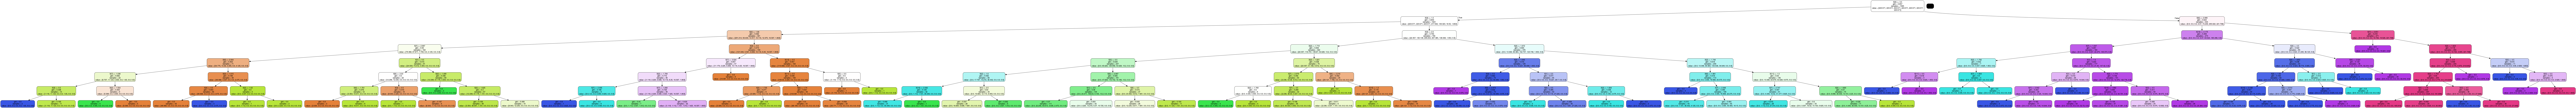

In [63]:
from sklearn import tree
from IPython.display import Image, display
import pydotplus
dot_data=tree.export_graphviz(dtree_model, out_file=None,filled=True,rounded=True)
#dot_data=tree.export_graphviz(dtree_model, out_file=None, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False)
graph= pydotplus.graph_from_dot_data(dot_data)
display(Image(data=graph.create_png()))

### SVM (SUPPORT VECTOR MACHINE) CLASSIFIER

Support Vector Machine (SVC) Classifier Accuracy Score : 0.6877394636015326
Support Vector Machine (SVC) Classification Report : 
              precision    recall  f1-score   support

         1.0       0.66      0.97      0.78        67
         2.0       0.66      0.53      0.59        81
         3.0       0.59      0.64      0.62        73
         4.0       0.54      0.36      0.43        69
         5.0       0.54      0.56      0.55        80
         6.0       0.87      0.76      0.81        68
         7.0       0.92      0.98      0.95        84

    accuracy                           0.69       522
   macro avg       0.68      0.69      0.68       522
weighted avg       0.69      0.69      0.68       522



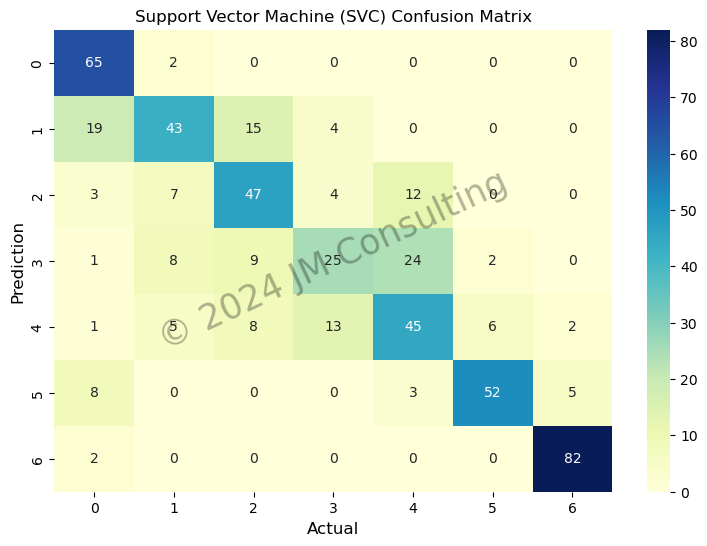

In [64]:
#import necessary libraries
from sklearn.svm import SVC

svc_model = SVC().fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

#print accuracy
svc_accuracy = svc_model.score(X_test, y_test) #accuracy_score(y_test, svc_predictions)
print("Support Vector Machine (SVC) Classifier Accuracy Score : % s"%(svc_accuracy))

#print classification report
svc_classfx_report = classification_report(y_test, svc_predictions)
print("Support Vector Machine (SVC) Classification Report : ")
print(svc_classfx_report)

#create a confusion matrix
svc_cx_matrix = confusion_matrix(y_test, svc_predictions)
#plot the confusion matrix
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(svc_cx_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
plt.ylabel('Prediction', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('Support Vector Machine (SVC) Confusion Matrix', fontsize=12)
copyright = "\u00A9" + " " + str(date.today().year) + " " + "JM Consulting"
plt.text(0.5, 0.5, copyright, alpha=0.3, fontsize=25, rotation=25, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()